In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

In [3]:
data = [
    [1, 2017, 37000, 1.25, 8700],
    [0, 2018, 25000, 1.25, 9800],
    [0, 2018, 25000, 1.25, 9800],
    [2, 2016, 54000, 1.25, 9400],
    [3, 2018, 4000, 1.25, 12300],
    [0, 2015, 51000, 1.25, 8000],
    [2, 2018, 8000, 1.25, 13000],
    [0, 2010, 138000, 1.25, 3600],
    [0, 2010, 93000, 1.25, 4000],
    [0, 2013, 130000, 1.25, 5800],
]

x0 = np.array(data)[:,0]
x1 = np.array(data)[:,1]
x2 = np.array(data)[:,2]
y = np.array(data)[:,-1]

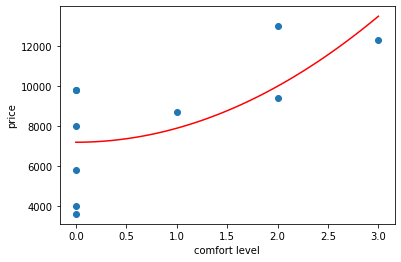

In [4]:
def p0(x, *param):
    a, b, c = param
    return a + b*(x-c)**2

initial_guess = [1,1,1]

popt0, _ = curve_fit(
    p0, 
    x0, 
    y, 
    initial_guess, 
    bounds=(0, np.inf)
)

plt.scatter(x0,y)
nx = np.linspace(min(x0), max(x0), 100)
plt.plot(nx, p0(nx, *popt0), 'r')
plt.xlabel('comfort level')
plt.ylabel('price');

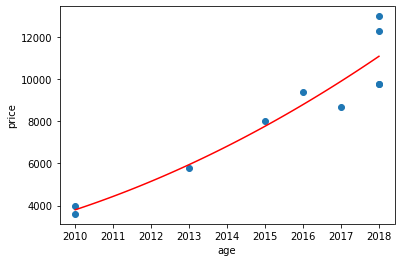

In [5]:
def p1(x, *param):
    a, b, c = param
    return a + b*(x-c)**2

initial_guess = [4000,10,1]

popt1, _ = curve_fit(
    p1, 
    x1, 
    y, 
    initial_guess, 
    bounds=(0, np.inf)
)

plt.scatter(x1,y)
nx = np.linspace(min(x1), max(x1), 100)
plt.plot(nx, p1(nx, *popt1), 'r')
plt.xlabel('age')
plt.ylabel('price');

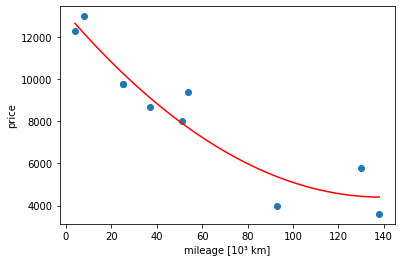

In [6]:
def p2(x, *param):
    a, b, c = param
    return a + b*(x-c)**2

initial_guess = [1,1,1]

popt2, _ = curve_fit(
    p2, 
    x2, 
    y, 
    initial_guess, 
    bounds=(0, np.inf)
)

plt.scatter(x2/1e3,y)
nx = np.linspace(min(x2), max(x2), 100)
plt.plot(nx/1e3, p2(nx, *popt2), 'r')
plt.xlabel('mileage [10³ km]')
plt.ylabel('price');

In [10]:
weights = np.array([0.2, 0.3, 0.5])
prices = np.array([p0(1, *popt0), p1(2015, *popt1), p2(50000, *popt2)])

np.dot(weights, prices)

7909.230460342533